<a href="https://colab.research.google.com/github/Asuskf/investigacion/blob/main/trabajoInvestigacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando las dependecias 

In [ ]:
!pip install fer

     |████████████████████████████████| 819kB 7.4MB/s 
     |████████████████████████████████| 2.3MB 20.4MB/s 


# Librerias

In [ ]:
%pylab inline
import os
import time
import random
import pandas as pd
from fer import FER
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import datetime
import pandas as pd
import numpy
import os
import gc 

numImages = 1000


Populating the interactive namespace from numpy and matplotlib


# Funciones

In [ ]:
def get_key(my_dict, val):
    for key, value in my_dict.items():
         if val == value:
             return key
 
    return "key doesn't exist"

# Descargar las mil imagenes para el análisis

In [ ]:
if not os.path.isdir('images'):
    os.system('mkdir images')
for index in range(0, numImages):
    time.sleep(2.4)
    command = f'wget --output-document=image{index}.jpeg https://thispersondoesnotexist.com/image' 
    os.system(command)

# Pasos opcional para guardar las imagenes descargadas 
**Nota:** Colab al reiniciarse o pasra 12 horas elimina los datos guardados o creados 

## Comprimir los datos descargados

In [ ]:
!zip -r images.zip images

## Guardar la carpeta comprimida en nuestro drive
**Nota:** Esta locaclización es propia de cada uno

In [ ]:
!cp images.zip /content/drive/MyDrive/Unir

## Tomamos los archivos guardados en el drive

In [ ]:
!cp /content/drive/MyDrive/Unir/images.zip /content/

## Descomprimimos el archivo que contiene nuestras fotos

In [ ]:
!unzip images.zip

Archive:  images.zip
   creating: images/
  inflating: images/image534.jpeg    
  inflating: images/image155.jpeg    
  inflating: images/image433.jpeg    
  inflating: images/image407.jpeg    
  inflating: images/image371.jpeg    
  inflating: images/image961.jpeg    
  inflating: images/image250.jpeg    
  inflating: images/image646.jpeg    
  inflating: images/image972.jpeg    
  inflating: images/image881.jpeg    
  inflating: images/image666.jpeg    
  inflating: images/image535.jpeg    
  inflating: images/image804.jpeg    
  inflating: images/image467.jpeg    
  inflating: images/image803.jpeg    
  inflating: images/image559.jpeg    
  inflating: images/image123.jpeg    
  inflating: images/image183.jpeg    
  inflating: images/image331.jpeg    
  inflating: images/image529.jpeg    
  inflating: images/image998.jpeg    
  inflating: images/image89.jpeg     
  inflating: images/image98.jpeg     
  inflating: images/image5.jpeg      
  inflating: images/image816.jpeg    
  inflat

# Analizar una foto al azar con Fer

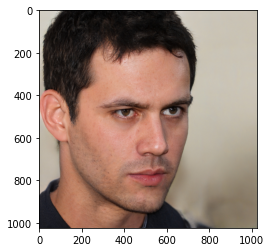

{'neutral': 0.61}

In [ ]:
imageNumberAnalyze  = random.randint(0,numImages-1)
pathImage  = f"images/image{imageNumberAnalyze}.jpeg"
img = cv2.imread(pathImage)
detector = FER()
img = mpimg.imread(pathImage)
imgplot = plt.imshow(img)
plt.show()
dictResultFER = detector.detect_emotions(img)
dictSentiments = dictResultFER[0]['emotions']
# Extraemos el sentimiento más representativo del resultado
representativeSentiment  =  max([dictSentiments[emotion] for emotion in dictSentiments.keys()])
result = {get_key(dictSentiments, representativeSentiment) : representativeSentiment}
result

# Análisis de datos
Extraer las metricas de los datos recolectados

In [ ]:
def getSentiments(path, numbeImages = 1000):
    auxDict = {}
    errorList = []
    detector = FER()
    for index in range(0, numbeImages):
        start = datetime.datetime.now()
        print(index)
        command = f'{path}{index}.jpeg'         
        img = cv2.imread(command)
        img = mpimg.imread(command)
        # Comando opcional para visualisar las imagenes que se están analizando
        """imgplot = plt.imshow(img)
        plt.show()"""
        dictResultFER = detector.detect_emotions(img)
        try:
            dictSentiments = dictResultFER[0]['emotions']
            representativeSentiment  =  max([dictSentiments[emotion] for emotion in dictSentiments.keys()])
            result = {get_key(dictSentiments, representativeSentiment) : representativeSentiment}
            sentiment = list(result.keys())[0]
            if sentiment in list(auxDict.keys()):
                auxDict[sentiment].append(1)
            else:
                auxDict[sentiment] = [1]
        except:
            errorList.append(index)
            if 'error' in list(auxDict.keys()):
                auxDict['error'].append(1)
            else:
                auxDict['error'] = [1]

        end =datetime.datetime.now()
        print(end - start)
    dictResult = {key: sum(auxDict[key]) for key in auxDict.keys()}    
    return [dictResult, errorList]


In [ ]:
pathImage = 'images/image'
sentiments = getSentiments(pathImage)

0
0:00:04.365526
1
0:00:00.354520
2
0:00:00.454457
3
0:00:00.313820
4
0:00:00.255446
5
0:00:00.395368
6
0:00:00.387527
7
0:00:00.259695
8
0:00:00.339893
9
0:00:00.421002
10
0:00:00.448534
11
0:00:00.298438
12
0:00:00.376655
13
0:00:00.369366
14
0:00:00.434850
15
0:00:00.384108
16
0:00:00.398110
17
0:00:00.292489
18
0:00:00.373794
19
0:00:00.361376
20
0:00:00.387152
21
0:00:00.321364
22
0:00:00.346652
23
0:00:00.342414
24
0:00:00.344748
25
0:00:00.459974
26
0:00:00.339223
27
0:00:00.367670
28
0:00:00.395282
29
0:00:00.322895
30
0:00:00.329183
31
0:00:00.380976
32
0:00:00.365065
33
0:00:00.353723
34
0:00:00.374806
35
0:00:00.413149
36
0:00:00.312592
37
0:00:00.355598
38
0:00:00.353295
39
0:00:00.278714
40
0:00:00.316480
41
0:00:00.404690
42
0:00:00.398658
43
0:00:00.411676
44
0:00:00.322892
45
0:00:00.279092
46
0:00:00.359958
47
0:00:00.291137
48
0:00:00.455597
49
0:00:00.320893
50
0:00:00.423006
51
0:00:00.294644
52
0:00:00.296196
53
0:00:00.393412
54
0:00:00.399225
55
0:00:00.237128
56

[{'angry': 8,
  'error': 3,
  'fear': 9,
  'happy': 585,
  'neutral': 338,
  'sad': 51,
  'surprise': 6},
 [270, 548, 987]]

# Guardamos el resultado obtenido en un dataframe

In [ ]:
pd.DataFrame(sentiments[0], index=[0]).to_csv('/content/drive/MyDrive/Unir/result.csv')

## Guardamos el número de las imagenes que no pudieron ser procesadas

In [ ]:
pd.DataFrame({'Number image error':sentiments[1]}).to_csv('/content/drive/MyDrive/Unir/imageError.csv')

## Cargamos el archivo guardado

In [ ]:
resultSentiments = pd.read_csv('/content/drive/MyDrive/Unir/result.csv')
numberImageError = pd.read_csv('/content/drive/MyDrive/Unir/imageError.csv')

## Eliminamos la primera columna del análisis de sentimientos
**Nota:** Es el index del resultado (Dato sin valor)

In [ ]:
analyseResult = resultSentiments[resultSentiments.columns[1:]]
analyseResult = analyseResult.rename(index={0: "result"})
analyseResult = analyseResult.T

# Analizando los resultados

In [ ]:
def calculatePorcentage(number, numImages):
    calculateError = number * 100 / numImages
    return calculateError

In [ ]:
analyseResult['porcentage'] = [f'{calculatePorcentage(number, numImages)}%' for number in analyseResult['result'].tolist()]

In [ ]:
analyseResult = analyseResult.sort_values(by=['result'], ascending=False)

,result,porcentage
happy,585,58.5%
neutral,338,33.8%
sad,51,5.1%
fear,9,0.9%
angry,8,0.8%
surprise,6,0.6%
error,3,0.3%


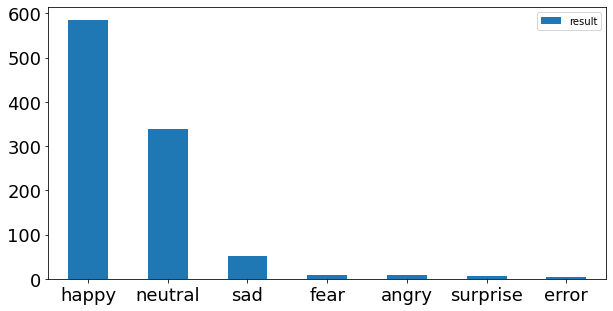

In [ ]:
ax = analyseResult.plot.bar( figsize=(10, 5), fontsize=18,  rot=0)

analyseResult

In [ ]:
f'Se obtuvo un error del {analyseResult.reset_index().iloc[6][2]} en las imagenes descargadas'

'Se obtuvo un error del 0.3% en las imagenes descargadas'

## Analizando los errores 

In [ ]:
numberImageError = numberImageError[numberImageError.columns[1:]]

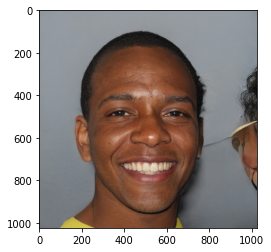

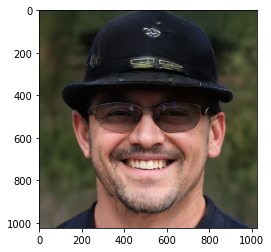

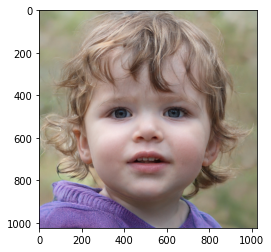

In [ ]:
for index in numberImageError['Number image error'].tolist():
    pathImage  = f"images/image{index}.jpeg"
    img = mpimg.imread(pathImage)
    imgplot = plt.imshow(img)
    plt.show()